#  중고 자동차 가격 예측
----------
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 거래가 기입된 년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

---

## 1. 데이터 및 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\korea\\OneDrive\\바탕 화면\\DA\\vehicles.csv')

##  2.EDA 


### 피쳐 확인

In [3]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [5]:
df.isna().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

중요 정보들이 NaN값들이 많아보임

In [9]:
df.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


- 가격: 최소값이 0인 부분 이상함, 최대가격이 너무 높아 평균치가 너무 높게 나타남
- year: 최소값 1900 입력값이 이상해보임
- odometer: max 값이 너무 큼

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

### 불필요한 피쳐 제거

In [11]:
# 불필요한 피쳐 제거
df.drop(['Unnamed: 0','id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long', 'posting_date'],
        axis=1,
        inplace=True)

description 피쳐: word embedding -> BoW방식처럼 feature vec로 바꿔주고 이를 자동차의 피쳐로 활용할 수 있을것 같기도 함

In [12]:
# 중고차 나이 피쳐 생성
df['age'] = 2021 - df['year']
df.drop(['year'], axis=1, inplace=True)

In [13]:
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
0,auburn,35990,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al,11.0
1,auburn,7500,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al,7.0
2,auburn,4900,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al,15.0
3,auburn,2000,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,47.0
4,auburn,19500,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,16.0


### 범주형 데이터 분석 및 시각화


In [14]:
cat_columns = df.dtypes[df.dtypes == 'object'].index.tolist()

cat_columns

['region',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [19]:
# 모델은 너무 많은 종류, 표현법도 다름
len(df['model'].value_counts())

31520

In [15]:
cat_columns =['manufacturer','condition','cylinders', 'fuel','transmission','drive','size','type','paint_color']

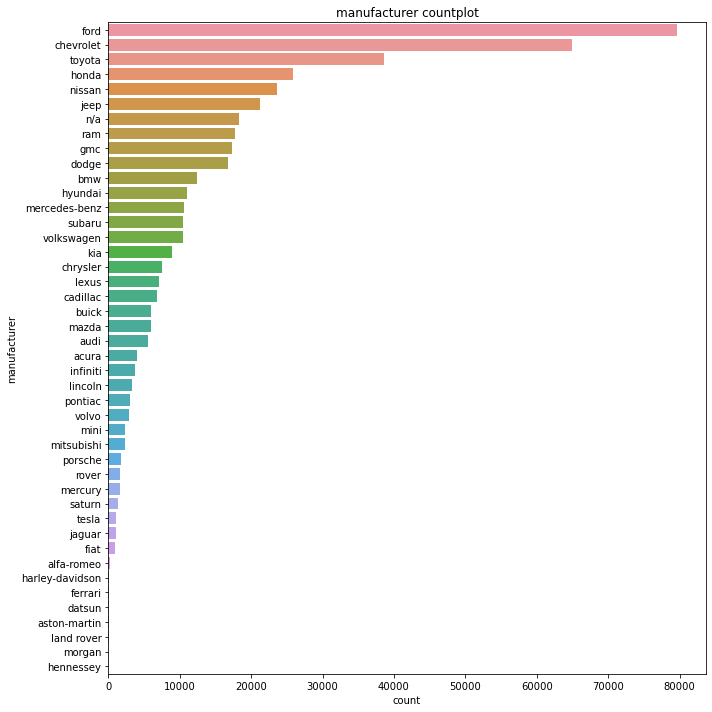

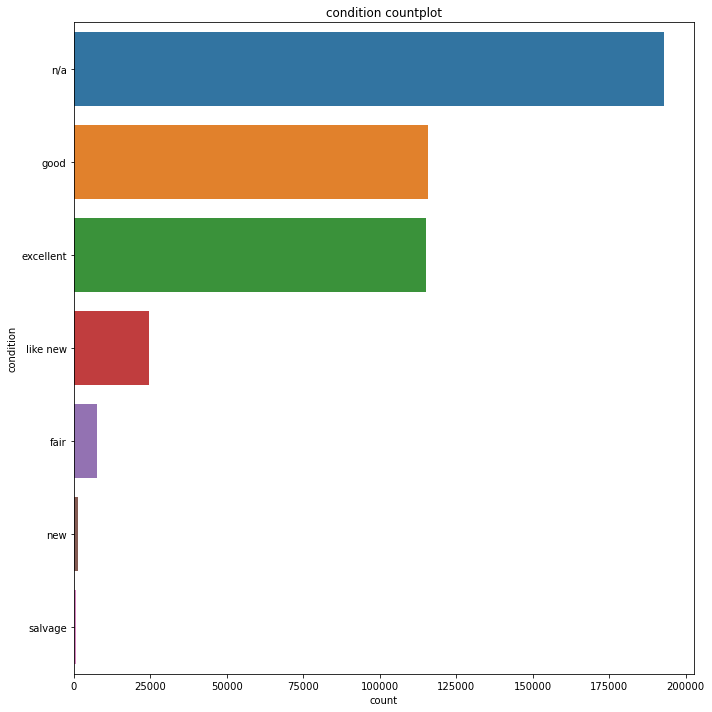

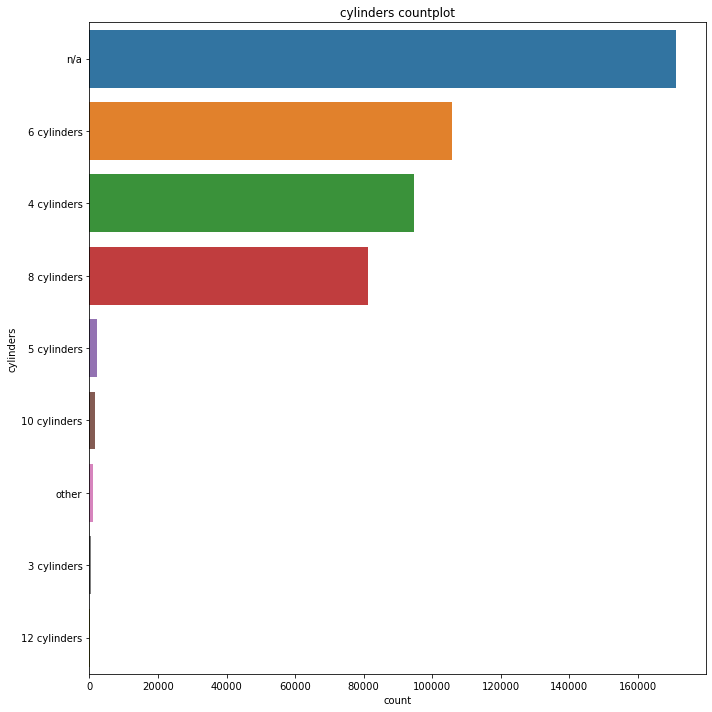

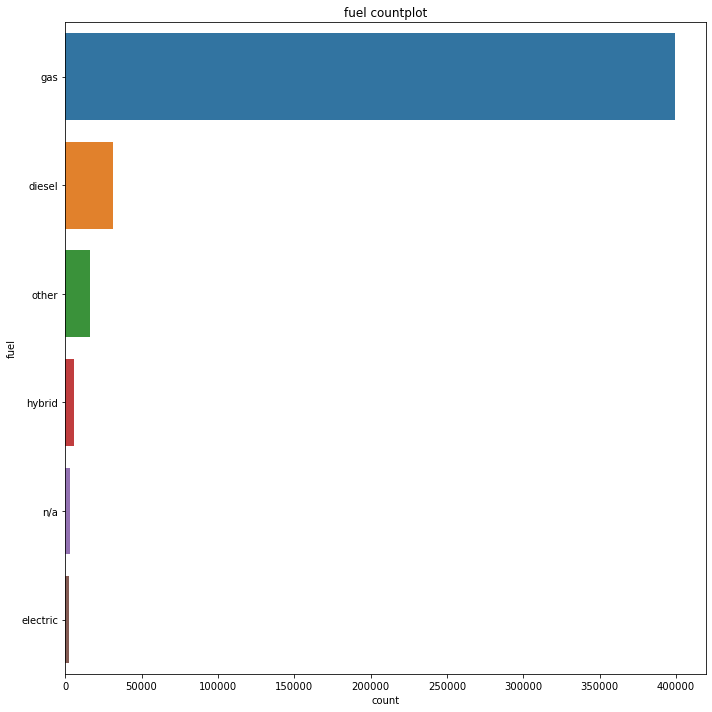

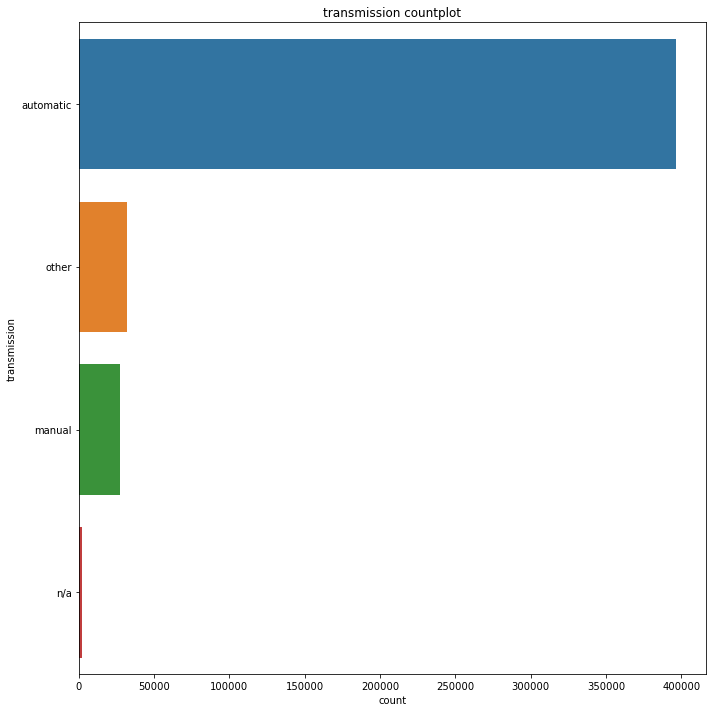

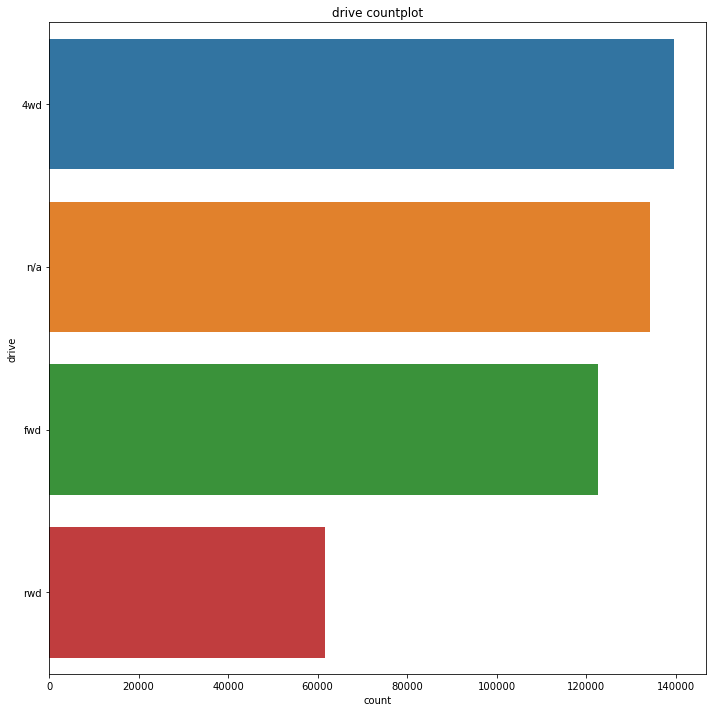

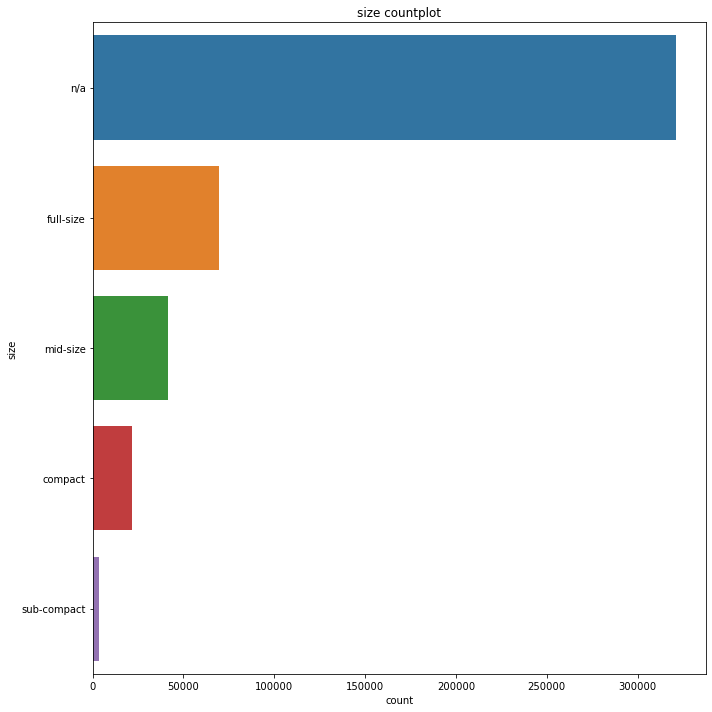

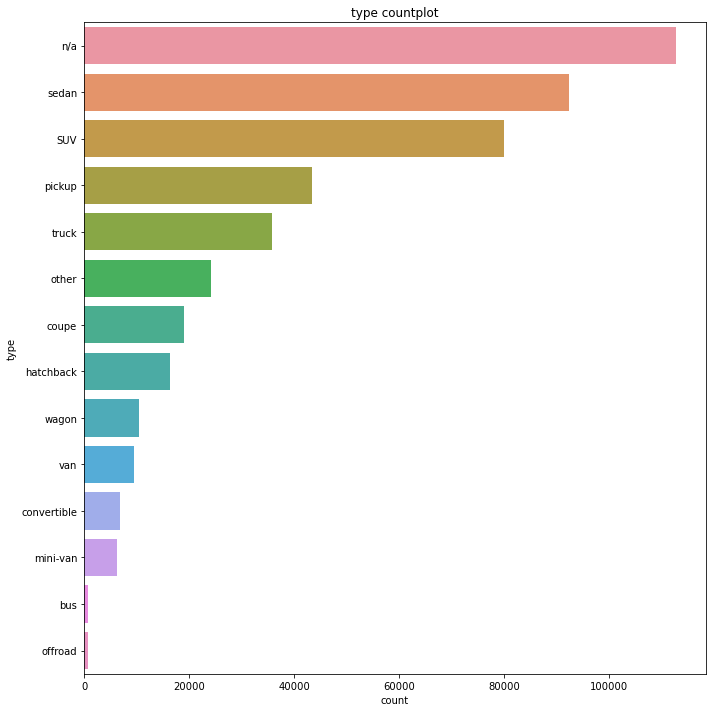

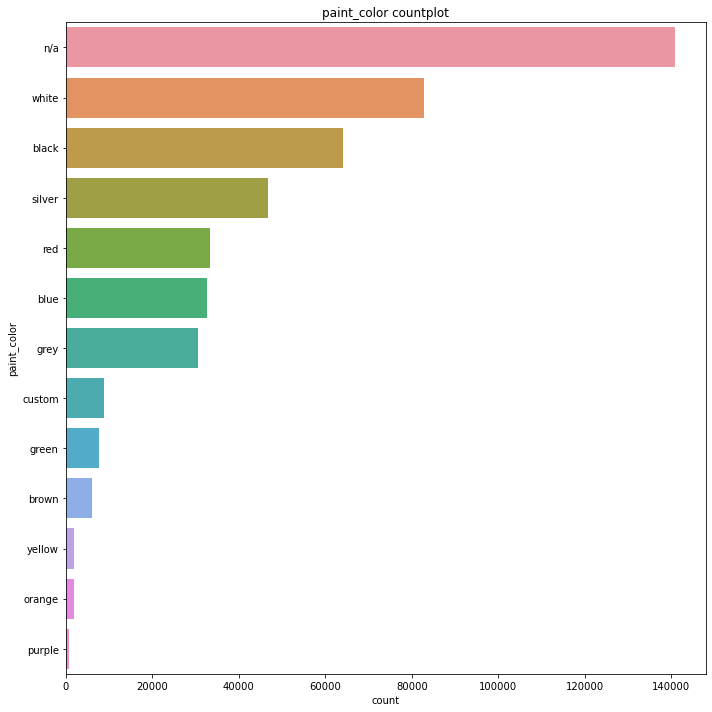

In [18]:
for column in cat_columns:
  fig = plt.figure(figsize=(10,10))
  sns.countplot(y=column, data=df.fillna('n/a'), order=df.fillna('n/a')[column].value_counts().index)
  plt.title(column + ' countplot')
  plt.tight_layout()

### 수치형 피쳐 분석 및 시각화

In [20]:
num_columns = df.dtypes[df.dtypes != 'object'].index.tolist()
num_columns

['price', 'odometer', 'age']

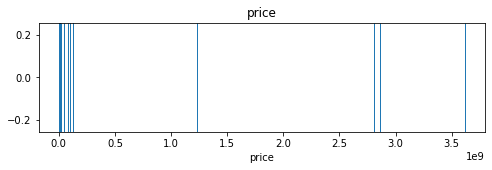

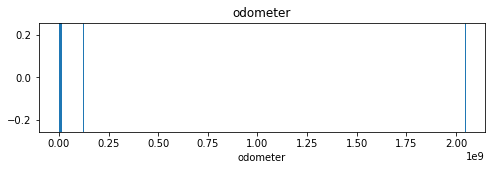

In [15]:
for column in ['price', 'odometer']:
  fig = plt.figure(figsize=(8,2))
  sns.rugplot(x=column, data=df, height=1)
  plt.title(column)

<AxesSubplot:xlabel='age', ylabel='Count'>

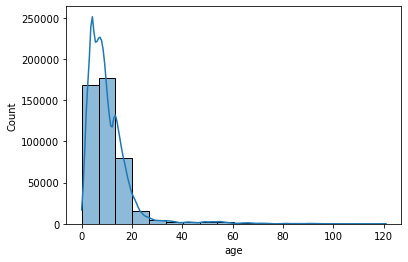

In [16]:
sns.histplot(data=df, x='age', bins=18, kde=True)

## 3.데이터 클리닝

### 범주형 데이터

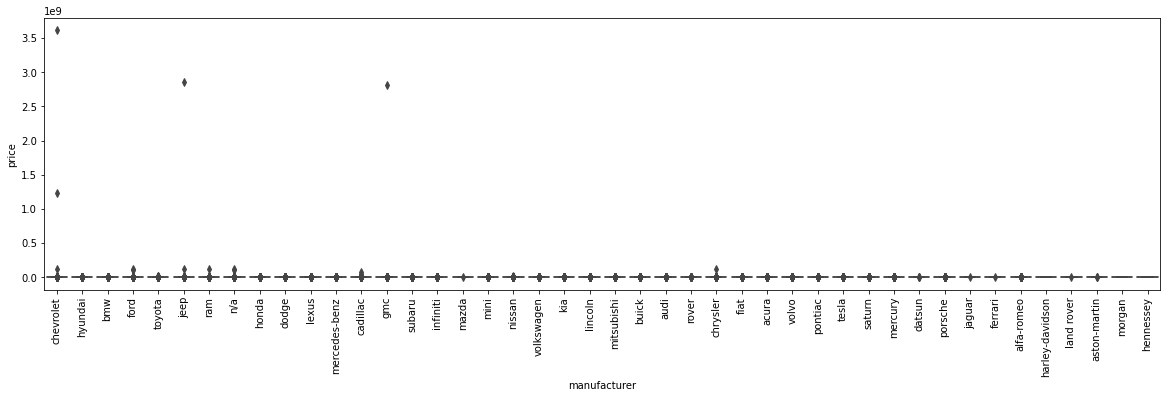

In [17]:
fig = plt.figure(figsize=(20,5))
sns.boxplot(x='manufacturer', y='price', data=df.fillna('n/a'))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='fuel', ylabel='price'>

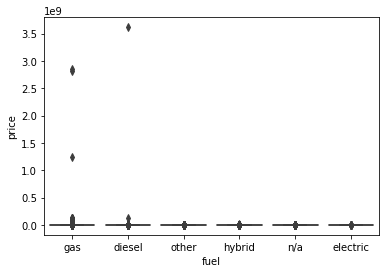

In [18]:
sns.boxplot(data=df.fillna('n/a'), x='fuel', y='price')

데이터를 클리닝하고 다시 boxplot 확인 필요해보임

* manufacturer 

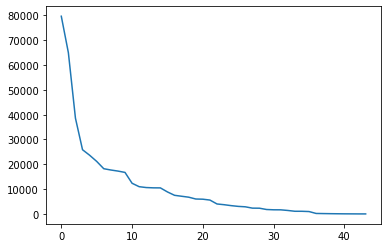

In [22]:
col = 'manufacturer'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)

In [23]:
# 10번째 이후는 다 others로 통합
n_categorical = 10

df[col] = df[col].apply(lambda x: x if str(x) not in counts.index[n_categorical:] else 'others')

In [24]:
df[col].value_counts()

others       134392
ford          79666
chevrolet     64977
toyota        38577
honda         25868
nissan        23654
jeep          21165
ram           17697
gmc           17267
dodge         16730
Name: manufacturer, dtype: int64

* region

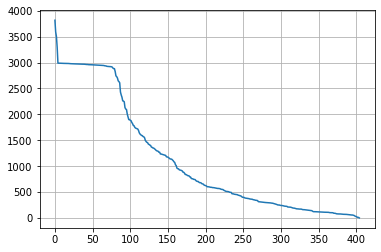

In [28]:
col = 'region'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [29]:
n_categorical = 5
df[col] = df[col].apply(lambda x: x if str(x) not in counts.index[n_categorical:] else 'others')

In [30]:
df[col].value_counts()

others          441016
columbus          3818
rochester         3592
jacksonville      3504
springfield       3293
fayetteville      2990
Name: region, dtype: int64

* model

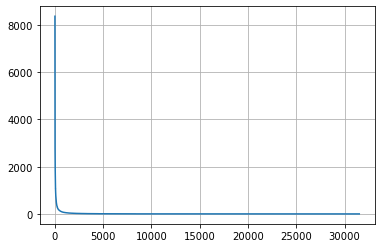

In [31]:
col = 'model'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

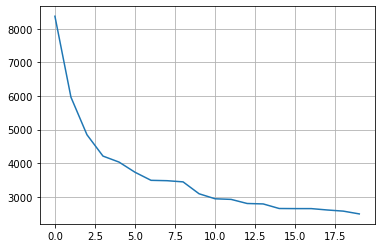

In [33]:
plt.grid()
plt.plot(range(len(counts[:20])), counts[:20])

In [35]:
n_categorical = 10
others = counts.index[n_categorical:]

df[col] = df[col].apply(lambda x: x if str(x) not in others else 'others')

* condition

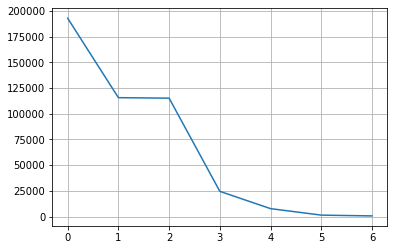

In [36]:
col = 'condition'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [37]:
n_categorical = 3
others = counts.index[n_categorical:]

df[col] = df[col].apply(lambda x: x if str(x) not in others else 'others')

In [39]:
df[col].value_counts()

good         115685
excellent    115206
others        34382
Name: condition, dtype: int64

* cylinders

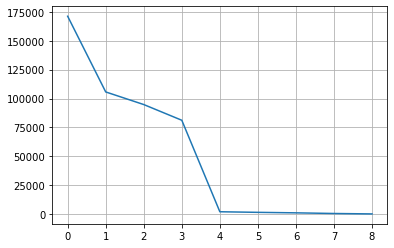

In [40]:
col = 'cylinders'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [41]:
n_categorical = 4
others = counts.index[n_categorical:]

df[col] = df[col].apply(lambda x: x if str(x) not in others else 'others')

In [42]:
df[col].value_counts()

6 cylinders    105677
4 cylinders     94767
8 cylinders     81179
others           5450
Name: cylinders, dtype: int64

* fuel

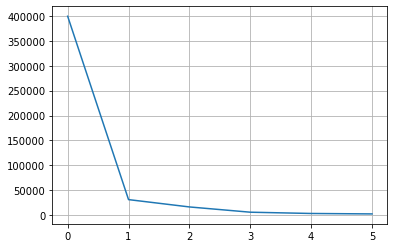

In [43]:
col = 'fuel'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [44]:
n_categorical = 2
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda x: x if str(x) not in others else 'others')

In [45]:
df[col].value_counts()

gas       399399
diesel     31077
others     24500
Name: fuel, dtype: int64

* title_status

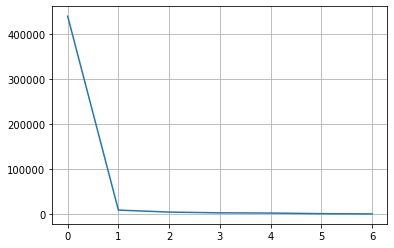

In [46]:
col = 'title_status'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [47]:
# title_status 0이 대부분, 칼럼 삭제
df.drop('title_status', axis=1, inplace=True)

* transmission

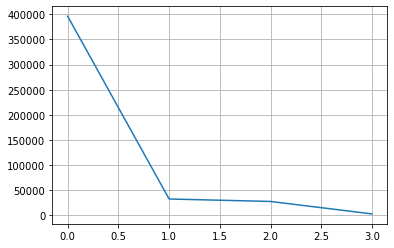

In [48]:
col = 'transmission'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [49]:
n_categorical = 3
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda x: x if str(x) not in others else 'others')

In [50]:
df[col].value_counts()

automatic    396322
other         32186
manual        27263
Name: transmission, dtype: int64

* drive

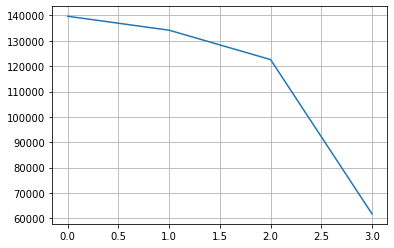

In [51]:
col = 'drive'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [53]:
# 따로 제한을 둘 필요는 없어보임, fillna만 inplace적용
df[col].fillna('others', inplace=True)

In [54]:
df[col].value_counts()

4wd       139693
others    134188
fwd       122602
rwd        61730
Name: drive, dtype: int64

* size

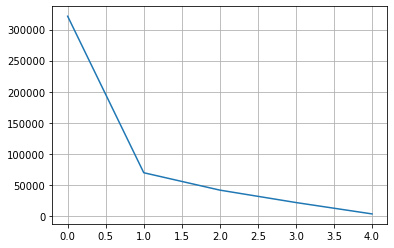

In [55]:
col = 'size'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [56]:
n_categorical = 2
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda x: x if str(x) not in others else 'others')

In [57]:
df[col].value_counts()

full-size    69736
others       67129
Name: size, dtype: int64

* type

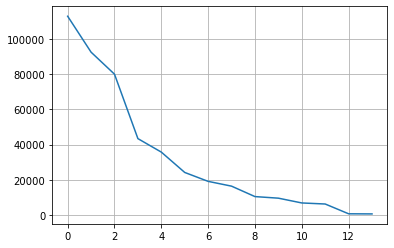

In [58]:
col = 'type'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [59]:
n_categorical = 8
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda x: x if str(x) not in others else 'others')

In [60]:
df[col].value_counts()

sedan        92364
SUV          79882
pickup       43343
truck        35694
others       34538
other        24160
coupe        19106
hatchback    16388
Name: type, dtype: int64

In [61]:
df.loc[df[col] == 'other', col] = 'others'

In [62]:
df[col].value_counts()

sedan        92364
SUV          79882
others       58698
pickup       43343
truck        35694
coupe        19106
hatchback    16388
Name: type, dtype: int64

* paint_color

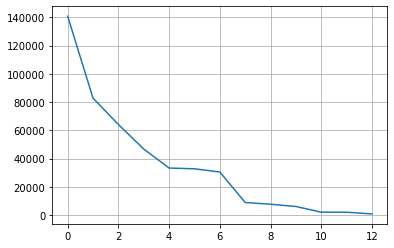

In [64]:
counts = df['paint_color'].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [65]:
n_categorical = 7
others = counts.index[n_categorical:]
df['paint_color'] = df['paint_color'].apply(lambda x: x if str(x) not in others else 'others')

In [66]:
df['paint_color'].value_counts()

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
others    27242
Name: paint_color, dtype: int64

### 수치형 데이터

* price 피쳐

In [67]:
# quantile() 메소드를 이용하여 outlier 제거
p1 = df['price'].quantile(0.99)  # 상위1%
p2 = df['price'].quantile(0.1)   # 하위 1%

print(p1,p2)

59900.0 651.0


In [68]:
df = df[(p1 > df['price']) & (p2 < df['price'])]

* odometer 피쳐

In [69]:
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1) # 하위 10%

print(o1, o2)

272803.10999999824 18593.0


In [70]:
df = df[(o1 > df['odometer']) & (o2 < df['odometer'])]

In [71]:
df.describe()

,price,odometer,age
count,322166.000000,322166.000000,321666.000000
mean,15211.239072,103341.828089,10.220235
std,11248.543565,55049.524247,7.071633
min,652.000000,18596.000000,0.000000
25%,6500.000000,57454.000000,6.000000
50%,12000.000000,98850.000000,9.000000
75%,20990.000000,141000.000000,13.000000
max,59895.000000,272742.000000,121.000000


## 3. 클리닝 이후 다시 시각화

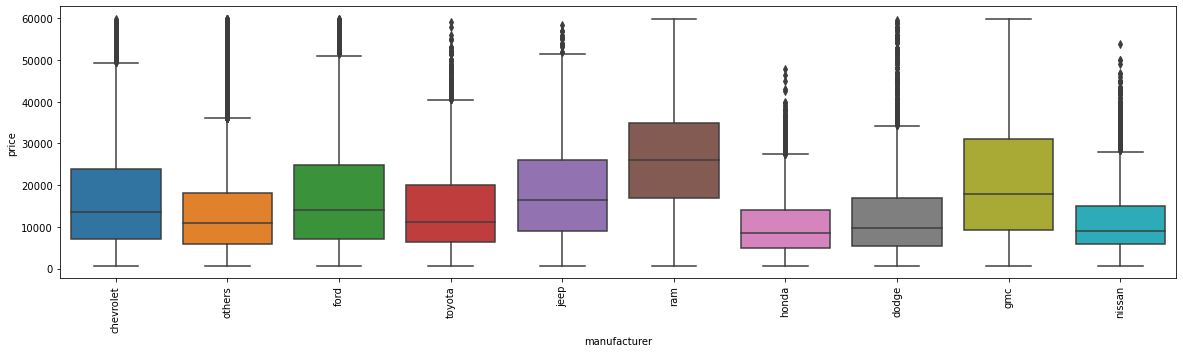

In [72]:
fig = plt.figure(figsize=(20,5))
sns.boxplot(x='manufacturer', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

평균에는 차이가 존재하나, 값의 범위가 조금 비슷함

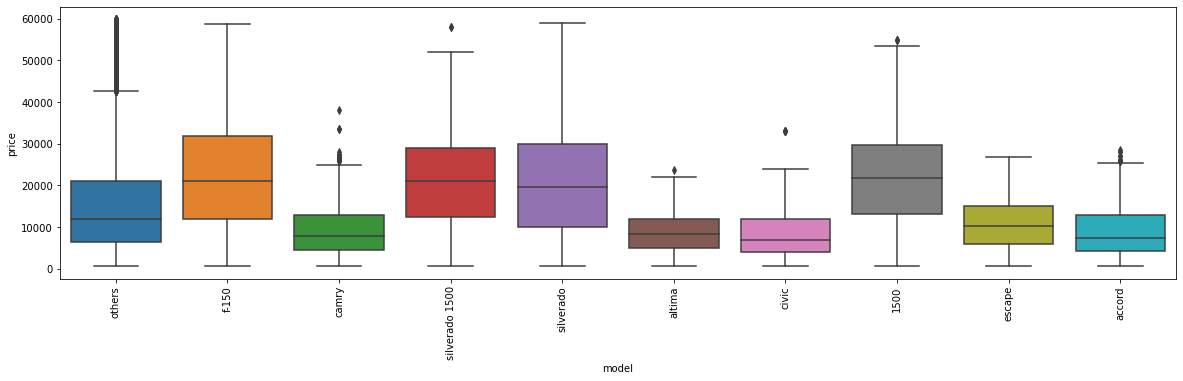

In [73]:
fig = plt.figure(figsize=(20,5))
sns.boxplot(x='model', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

### 피쳐 간 corr Heatmap

<AxesSubplot:>

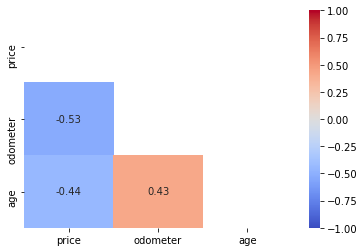

In [74]:
corr_columns = ['price', 'odometer', 'age']
corr = df[corr_columns].corr()
mask = np.triu(np.ones_like(corr))

sns.heatmap(corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1, mask=mask)

## 4. 모델 학습을 위한 데이터 전처리 

### StandardScaler를 이용해 수치형 데이터 표준화


In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
df.dtypes

region           object
price             int64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
age             float64
dtype: object

In [78]:
# StandardScaler를 이용해 수치형 데이터를 표준화
X_num = df[['odometer', 'age']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변환 
X_cat = df.drop(['price','odometer','age'], axis=1)
X_cat = pd.get_dummies(X_cat)

# 입출력 데이터 통합하기
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [79]:
X.head()

,odometer,age,region_columbus,region_fayetteville,region_jacksonville,region_others,region_rochester,region_springfield,manufacturer_chevrolet,manufacturer_dodge,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,-1.282480,0.110267,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.176965,-0.455374,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.296022,0.675908,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.574188,5.201037,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.229942,0.817318,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
X.isna().sum()

odometer                 0
age                    500
region_columbus          0
region_fayetteville      0
region_jacksonville      0
                      ... 
state_vt                 0
state_wa                 0
state_wi                 0
state_wv                 0
state_wy                 0
Length: 112, dtype: int64

age가 500개 na값임

In [83]:
X['age'].mean()

-1.6971181595987114e-15

age 평균값 0에 가까움

In [84]:
X.fillna(0.0, inplace=True)

### 학습 데이터, 테스트 데이터 분리


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##  5.Regression 모델 학습

###  XGBoost Regression 모델

In [88]:
from xgboost import XGBRegressor

In [89]:
# XGBRegressor 모델 생성/학습
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### 모델 학습 결과 평가

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [91]:
pred = xgb_reg.predict(X_test)

# MAE
print(mean_absolute_error(y_test, pred))

# MSE
print(sqrt(mean_squared_error(y_test, pred)))

3073.144876308058
4700.191209868938


오차가 크게 나타남

## 6. 모델 학습 결과 분석


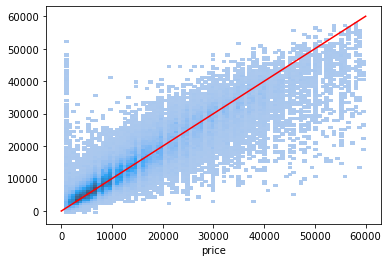

In [99]:
# 실제 값과 예측 값 간의 시각화
sns.histplot(x=y_test, y=pred)
plt.plot([0,60000], [0,60000], 'r-')

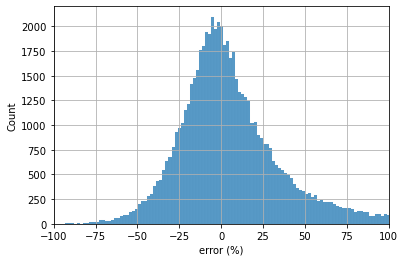

In [98]:
# 오차율 시각화

err = (pred - y_test) / y_test * 100
sns.histplot(err)
plt.xlabel('error (%)')
plt.xlim(-100, 100)
plt.grid()

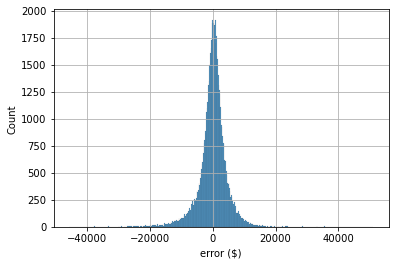

In [96]:
# 오차 시각화

err = (pred - y_test)
sns.histplot(err)
plt.xlabel('error ($)')
plt.grid()